# **Machine Learning Algorithms and Application**
# **AT2 Part D**
### **DecisionTree**

1. Load dataset
2. Exploring dataset
3. Data Cleaning
4. Preparing Dataset
5. Assessing Baseline
6. Training DecisionTree with min_samples_split
7. Training DecisionTree with min_samples_split and max_depth
8. DecisionTree with automated hyperparameter tuning (RandomSearch)

## **1. Load dataset**

**1.1 Importing pandas and numpy packages**

In [ ]:
import pandas as pd
import numpy as np

**1.2 Reading csv file**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mcyaputra/Files/main/repurchase_training.csv')

## **2. Exploring dataset**

**2.1 First 10 rows of the dataset**

In [ ]:
df.head(10)

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9
5,7,0,NaN,Male,model_5,Large/SUV,7,4,10,5,7,6,8,8,5,10,4
6,8,0,1. <25,Male,model_3,Large/SUV,8,2,8,2,9,9,4,7,6,10,4
7,9,0,NaN,Male,model_6,Small/Medium,7,4,9,6,9,8,6,9,5,5,8
8,10,0,NaN,NaN,model_4,Small/Medium,1,2,1,1,3,1,2,1,1,2,3
9,11,0,NaN,NaN,model_4,Small/Medium,3,1,1,2,1,2,1,1,1,1,1


**2.2 Showing information about dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

Looks like 'age_band' and 'gender' columns have missing values

**2.3 Number of rows and columns in the dataset**

In [ ]:
df.shape

(131337, 17)

**2.4 Statistical information of the dataset**

In [ ]:
df.describe()

,ID,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,77097.384180,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,154139.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


**2.5 Showing unique values of every columns**

In [ ]:
for col in df.columns:
  print(col)
  print(df[col].unique())

ID
[     1      2      3 ... 154137 154138 154139]
Target
[0 1]
age_band
['3. 35 to 44' nan '1. <25' '4. 45 to 54' '2. 25 to 34' '7. 75+'
 '5. 55 to 64' '6. 65 to 74']
gender
['Male' nan 'Female']
car_model
['model_1' 'model_2' 'model_3' 'model_5' 'model_6' 'model_4' 'model_7'
 'model_8' 'model_9' 'model_10' 'model_11' 'model_13' 'model_12'
 'model_14' 'model_15' 'model_16' 'model_17' 'model_18' 'model_19']
car_segment
['LCV' 'Small/Medium' 'Large/SUV' 'Other']
age_of_vehicle_years
[ 9  6  5  8  7  1  3  4 10  2]
sched_serv_warr
[ 2 10  8  9  4  1  3  7  5  6]
non_sched_serv_warr
[10  3  9  5  4  8  1  6  2  7]
sched_serv_paid
[ 3 10  8  5  2  6  1  4  9  7]
non_sched_serv_paid
[ 7  4  9  3  1  2  6  5 10  8]
total_paid_services
[ 5  9 10  6  8  1  2  7  3  4]
total_services
[ 6 10  8  4  2  1  3  5  9  7]
mth_since_last_serv
[ 9  6  7  4  5  8  1  3 10  2]
annualised_mileage
[ 8 10  4  5  6  1  7  3  9  2]
num_dealers_visited
[10  7  6  9  4  5  2  1  3  8]
num_serv_dealer_purchased
[

## **3. Data cleaning**

**3.1 Creating a copy of the dataset**

In [ ]:
df_cleaned = df.copy()

**3.2 Dropping 'age_band' and 'gender' (too many null values) and 'ID' (irrelevant to target variable)**

In [ ]:
df_cleaned.drop(columns=['age_band', 'gender', 'ID'], axis=1, inplace=True)

**3.3 Number of remaining columns**

In [ ]:
df_cleaned.shape

(131337, 14)

**3.4 Checking for null values**

In [ ]:
df_cleaned.isna().sum()

Target                       0
car_model                    0
car_segment                  0
age_of_vehicle_years         0
sched_serv_warr              0
non_sched_serv_warr          0
sched_serv_paid              0
non_sched_serv_paid          0
total_paid_services          0
total_services               0
mth_since_last_serv          0
annualised_mileage           0
num_dealers_visited          0
num_serv_dealer_purchased    0
dtype: int64

## **4. Preparing dataset**

**4.1 Showing unique values in 'car_model'**

In [ ]:
df_cleaned.car_model.unique()

array(['model_1', 'model_2', 'model_3', 'model_5', 'model_6', 'model_4',
       'model_7', 'model_8', 'model_9', 'model_10', 'model_11',
       'model_13', 'model_12', 'model_14', 'model_15', 'model_16',
       'model_17', 'model_18', 'model_19'], dtype=object)

**4.2 Importing OrdinalEncoder from sklearn.preprocessing**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

**4.3 Creating dictionary containing the values**

In [ ]:
car_model_categories = [['model_1', 'model_2', 'model_3', 'model_5', 'model_6', 'model_4',
       'model_7', 'model_8', 'model_9', 'model_10', 'model_11',
       'model_13', 'model_12', 'model_14', 'model_15', 'model_16',
       'model_17', 'model_18', 'model_19']]

**4.4 Instantiating OrdinalEncoder class and saving it to a variable**

In [ ]:
car_model_encoded = OrdinalEncoder(categories = car_model_categories)

**4.5 Using the encoder to transform the columm**

In [ ]:
df_cleaned['car_model_categories'] = car_model_encoded.fit_transform(df_cleaned[['car_model']])

**4.6 Removing the previous column**

In [ ]:
df_cleaned['car_model'] = df_cleaned['car_model_categories']
df_cleaned.drop('car_model_categories', axis=1, inplace=True)

df_cleaned['car_model'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18.])

**4.7 Creating dictionary containing 'car_segment' values**

In [ ]:
df_cleaned['car_segment'].unique()

array(['LCV', 'Small/Medium', 'Large/SUV', 'Other'], dtype=object)

In [ ]:
df_cleaned.car_segment = df_cleaned.car_segment.map({'LCV':0, 'Small/Medium':1, 'Large/SUV':2, 'Other':3})

In [ ]:
df_cleaned['car_segment'].unique()

array([0, 1, 2, 3])

**4.8 Assigning target variable to a variable**

In [ ]:
y = df_cleaned.pop('Target')

**4.9 Assigning features to a variable**

In [ ]:
X = df_cleaned

**4.10 Importing train_test_split from sklearn**

In [ ]:
from sklearn.model_selection import train_test_split

**4.11 Splitting target variable and features into training and testing datasets**

In [ ]:
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

**4.12 Splitting target variable and features into training and validation datasets**

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=3, stratify=y_data)

**4.13 Showing the distribution of target variable after splitting datasets**

In [ ]:
print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.973184
1    0.026816
Name: Target, dtype: float64
0    0.973208
1    0.026792
Name: Target, dtype: float64
0    0.973199
1    0.026801
Name: Target, dtype: float64


## **5. Assessing baseline**

**5.1 Finding the mode of target variable**

In [ ]:
y_mode = y.mode()

**5.2 Creating a numpy array and assigning the value to a variable**

In [ ]:
y_base = np.full(y_train.shape, y_mode)

**5.3 Importing accuracy, precision, recall and f1 scores from sklearn**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

**5.4 Calculating accuracy and f1 score**

In [ ]:
print(accuracy_score(y_train, y_base))
print(f1_score(y_train, y_base, average='weighted'))

0.9731842246148356
0.9599585514870511


## **6. Training Decision Tree**

**6.1 Importing DecisionTree from sklearn**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

**6.2 Training DecisionTree with default hyperparameter**

Training the model using training set

In [ ]:
tree_1 = DecisionTreeClassifier(random_state=3).fit(X_train, y_train)

Predicting and calculating precision, recall and f1 scores

In [ ]:
y_train_preds = tree_1.predict(X_train)
y_val_preds = tree_1.predict(X_val)
y_test_preds = tree_1.predict(X_test)

print('Accuracy:')
print(f"Training set: {round(accuracy_score(y_train, y_train_preds), 5)}")
print(f"Validation set: {round(accuracy_score(y_val, y_val_preds), 5)}")
print(f"Testing set: {round(accuracy_score(y_test, y_test_preds), 5)}")

print('')

print('Precision:')
print(f"Training set: {round(precision_score(y_train, y_train_preds), 5)}")
print(f"Validation set: {round(precision_score(y_val, y_val_preds), 5)}")
print(f"Testing set: {round(precision_score(y_test, y_test_preds), 5)}")

print('')

print('Recall:')
print(f"Training set: {round(recall_score(y_train, y_train_preds), 5)}")
print(f"Validation set: {round(recall_score(y_val, y_val_preds), 5)}")
print(f"Testing set: {round(recall_score(y_test, y_test_preds), 5)}")

print('')

print('F1 score:')
print(f"Training set: {round(f1_score(y_train, y_train_preds), 5)}")
print(f"Validation set: {round(f1_score(y_val, y_val_preds), 5)}")
print(f"Testing set: {round(f1_score(y_test, y_test_preds), 5)}")

Accuracy:
Training set: 0.99999
Validation set: 0.98725
Testing set: 0.98827

Precision:
Training set: 1.0
Validation set: 0.75832
Testing set: 0.78045

Recall:
Training set: 0.99956
Validation set: 0.76909
Testing set: 0.78267

F1 score:
Training set: 0.99978
Validation set: 0.76367
Testing set: 0.78156


Accuracy score can misleading due to unbalanced dataset, we will drop accuracy score from now on

## **7. Training DecisionTree with min_samples_split**

**7.1 Training DecisionTree with min_samples_split = 5**

Training the model using training set

In [ ]:
tree_2 = DecisionTreeClassifier(random_state=3, min_samples_split=5).fit(X_train, y_train)

Predicting and calculating precision, recall and f1 scores

In [ ]:
y_train_preds2 = tree_2.predict(X_train)
y_val_preds2 = tree_2.predict(X_val)
y_test_preds2 = tree_2.predict(X_test)

print('Precision:')
print(f"Training set: {round(precision_score(y_train, y_train_preds2), 5)}")
print(f"Validation set: {round(precision_score(y_val, y_val_preds2), 5)}")
print(f"Testing set: {round(precision_score(y_test, y_test_preds2), 5)}")

print('')

print('Recall:')
print(f"Training set: {round(recall_score(y_train, y_train_preds2), 5)}")
print(f"Validation set: {round(recall_score(y_val, y_val_preds2), 5)}")
print(f"Testing set: {round(recall_score(y_test, y_test_preds2), 5)}")

print('')

print('F1 score:')
print(f"Training set: {round(f1_score(y_train, y_train_preds2), 5)}")
print(f"Validation set: {round(f1_score(y_val, y_val_preds2), 5)}")
print(f"Testing set: {round(f1_score(y_test, y_test_preds2), 5)}")

Precision:
Training set: 0.98121
Validation set: 0.77536
Testing set: 0.81694

Recall:
Training set: 0.94987
Validation set: 0.76021
Testing set: 0.76705

F1 score:
Training set: 0.96528
Validation set: 0.76771
Testing set: 0.79121


**7.2 Training DecisionTree with min_samples_split = 10**

Training the model using training set

In [ ]:
tree_3 = DecisionTreeClassifier(random_state=3, min_samples_split=10).fit(X_train, y_train)

Predicting and calculating precision, recall and f1 scores

In [ ]:
y_train_preds3 = tree_3.predict(X_train)
y_val_preds3 = tree_3.predict(X_val)
y_test_preds3 = tree_3.predict(X_test)

print('Precision:')
print(f"Training set: {round(precision_score(y_train, y_train_preds3), 5)}")
print(f"Validation set: {round(precision_score(y_val, y_val_preds3), 5)}")
print(f"Testing set: {round(precision_score(y_test, y_test_preds3), 5)}")

print('')

print('Recall:')
print(f"Training set: {round(recall_score(y_train, y_train_preds3), 5)}")
print(f"Validation set: {round(recall_score(y_val, y_val_preds3), 5)}")
print(f"Testing set: {round(recall_score(y_test, y_test_preds3), 5)}")

print('')

print('F1 score:')
print(f"Training set: {round(f1_score(y_train, y_train_preds3), 5)}")
print(f"Validation set: {round(f1_score(y_val, y_val_preds3), 5)}")
print(f"Testing set: {round(f1_score(y_test, y_test_preds3), 5)}")

Precision:
Training set: 0.95455
Validation set: 0.83037
Testing set: 0.84087

Recall:
Training set: 0.89441
Validation set: 0.74778
Testing set: 0.76562

F1 score:
Training set: 0.9235
Validation set: 0.78692
Testing set: 0.80149


**7.3 Training DecisionTree with min_samples_split = 15**

Training the model using training set

In [ ]:
tree_4 = DecisionTreeClassifier(random_state=3, min_samples_split=15).fit(X_train, y_train)

Predicting and calculating precision, recall and f1 scores

In [ ]:
y_train_preds4 = tree_4.predict(X_train)
y_val_preds4 = tree_4.predict(X_val)
y_test_preds4 = tree_4.predict(X_test)

print('Precision:')
print(f"Training set: {round(precision_score(y_train, y_train_preds4), 5)}")
print(f"Validation set: {round(precision_score(y_val, y_val_preds4), 5)}")
print(f"Testing set: {round(precision_score(y_test, y_test_preds4), 5)}")

print('')

print('Recall:')
print(f"Training set: {round(recall_score(y_train, y_train_preds4), 5)}")
print(f"Validation set: {round(recall_score(y_val, y_val_preds4), 5)}")
print(f"Testing set: {round(recall_score(y_test, y_test_preds4), 5)}")

print('')

print('F1 score:')
print(f"Training set: {round(f1_score(y_train, y_train_preds4), 5)}")
print(f"Validation set: {round(f1_score(y_val, y_val_preds4), 5)}")
print(f"Testing set: {round(f1_score(y_test, y_test_preds4), 5)}")

Precision:
Training set: 0.94033
Validation set: 0.82738
Testing set: 0.8464

Recall:
Training set: 0.8669
Validation set: 0.74067
Testing set: 0.75142

F1 score:
Training set: 0.90212
Validation set: 0.78163
Testing set: 0.79609


Training the same model but adding class_weight='balanced'

In [ ]:
tree_4_balanced = DecisionTreeClassifier(random_state=3, class_weight='balanced', min_samples_split=15).fit(X_train, y_train)

In [ ]:
y_train_preds4_balanced = tree_4_balanced.predict(X_train)
y_val_preds4_balanced = tree_4_balanced.predict(X_val)
y_test_preds4_balanced = tree_4_balanced.predict(X_test)

print('Precision:')
print(f"Training set: {round(precision_score(y_train, y_train_preds4_balanced), 5)}")
print(f"Validation set: {round(precision_score(y_val, y_val_preds4_balanced), 5)}")
print(f"Testing set: {round(precision_score(y_test, y_test_preds4_balanced), 5)}")

print('')

print('Recall:')
print(f"Training set: {round(recall_score(y_train, y_train_preds4_balanced), 5)}")
print(f"Validation set: {round(recall_score(y_val, y_val_preds4_balanced), 5)}")
print(f"Testing set: {round(recall_score(y_test, y_test_preds4_balanced), 5)}")

print('')

print('F1 score:')
print(f"Training set: {round(f1_score(y_train, y_train_preds4_balanced), 5)}")
print(f"Validation set: {round(f1_score(y_val, y_val_preds4_balanced), 5)}")
print(f"Testing set: {round(f1_score(y_test, y_test_preds4_balanced), 5)}")

Precision:
Training set: 0.68594
Validation set: 0.54976
Testing set: 0.58709

Recall:
Training set: 1.0
Validation set: 0.82416
Testing set: 0.81392

F1 score:
Training set: 0.81372
Validation set: 0.65956
Testing set: 0.68214


**7.4 Training DecisionTree with min_samples_split = 20**

Training the model using training set

In [ ]:
tree_5 = DecisionTreeClassifier(random_state=3, min_samples_split=20).fit(X_train, y_train)

Predicting and calculating precision, recall and f1 scores

In [ ]:
y_train_preds5 = tree_5.predict(X_train)
y_val_preds5 = tree_5.predict(X_val)
y_test_preds5 = tree_5.predict(X_test)

print('Precision:')
print(f"Training set: {round(precision_score(y_train, y_train_preds5), 5)}")
print(f"Validation set: {round(precision_score(y_val, y_val_preds5), 5)}")
print(f"Testing set: {round(precision_score(y_test, y_test_preds5), 5)}")

print('')

print('Recall:')
print(f"Training set: {round(recall_score(y_train, y_train_preds5), 5)}")
print(f"Validation set: {round(recall_score(y_val, y_val_preds5), 5)}")
print(f"Testing set: {round(recall_score(y_test, y_test_preds5), 5)}")

print('')

print('F1 score:')
print(f"Training set: {round(f1_score(y_train, y_train_preds5), 5)}")
print(f"Validation set: {round(f1_score(y_val, y_val_preds5), 5)}")
print(f"Testing set: {round(f1_score(y_test, y_test_preds5), 5)}")

Precision:
Training set: 0.92271
Validation set: 0.81503
Testing set: 0.84751

Recall:
Training set: 0.85803
Validation set: 0.75133
Testing set: 0.75

F1 score:
Training set: 0.8892
Validation set: 0.78189
Testing set: 0.79578


**7.5 Training DecisionTree with min_samples_split = 25**

Training the model using training set

In [ ]:
tree_6 = DecisionTreeClassifier(random_state=3, min_samples_split=25).fit(X_train, y_train)

Predicting and calculating precision, recall and f1 scores

In [ ]:
y_train_preds6 = tree_6.predict(X_train)
y_val_preds6 = tree_6.predict(X_val)
y_test_preds6 = tree_6.predict(X_test)

print('Precision:')
print(f"Training set: {round(precision_score(y_train, y_train_preds6), 5)}")
print(f"Validation set: {round(precision_score(y_val, y_val_preds6), 5)}")
print(f"Testing set: {round(precision_score(y_test, y_test_preds6), 5)}")

print('')

print('Recall:')
print(f"Training set: {round(recall_score(y_train, y_train_preds6), 5)}")
print(f"Validation set: {round(recall_score(y_val, y_val_preds6), 5)}")
print(f"Testing set: {round(recall_score(y_test, y_test_preds6), 5)}")

print('')

print('F1 score:')
print(f"Training set: {round(f1_score(y_train, y_train_preds4), 5)}")
print(f"Validation set: {round(f1_score(y_val, y_val_preds4), 5)}")
print(f"Testing set: {round(f1_score(y_test, y_test_preds4), 5)}")

Precision:
Training set: 0.92087
Validation set: 0.8248
Testing set: 0.86275

Recall:
Training set: 0.84161
Validation set: 0.74423
Testing set: 0.75

F1 score:
Training set: 0.90212
Validation set: 0.78163
Testing set: 0.79609


## **8. Training DecisionTree with min_samples_split and max_depth**

In [ ]:
tree_5.tree_.max_depth

23

**8.1 Training DecisionTree with min_samples_split = 20, max depth = 3**

Training the model using training set

In [ ]:
tree_7 = DecisionTreeClassifier(random_state=3, min_samples_split=20, max_depth=5).fit(X_train, y_train)

Predicting and calculating precision, recall and f1 scores

In [ ]:
y_train_preds7 = tree_7.predict(X_train)
y_val_preds7 = tree_7.predict(X_val)
y_test_preds7 = tree_7.predict(X_test)

print('Precision:')
print(f"Training set: {round(precision_score(y_train, y_train_preds7), 5)}")
print(f"Validation set: {round(precision_score(y_val, y_val_preds7), 5)}")
print(f"Testing set: {round(precision_score(y_test, y_test_preds7), 5)}")

print('')

print('Recall:')
print(f"Training set: {round(recall_score(y_train, y_train_preds7), 5)}")
print(f"Validation set: {round(recall_score(y_val, y_val_preds7), 5)}")
print(f"Testing set: {round(recall_score(y_test, y_test_preds7), 5)}")

print('')

print('F1 score:')
print(f"Training set: {round(f1_score(y_train, y_train_preds7), 5)}")
print(f"Validation set: {round(f1_score(y_val, y_val_preds7), 5)}")
print(f"Testing set: {round(f1_score(y_test, y_test_preds7), 5)}")

Precision:
Training set: 0.83895
Validation set: 0.79941
Testing set: 0.83827

Recall:
Training set: 0.50843
Validation set: 0.48135
Testing set: 0.52273

F1 score:
Training set: 0.63315
Validation set: 0.60089
Testing set: 0.64392


**8.2 Training DecisionTree with min_samples_split = 20, max depth = 8**

Training the model using training set

In [ ]:
tree_8 = DecisionTreeClassifier(random_state=3, min_samples_split=20, max_depth=8).fit(X_train, y_train)

Predicting and calculating precision, recall and f1 scores

In [ ]:
y_train_preds8 = tree_8.predict(X_train)
y_val_preds8 = tree_8.predict(X_val)
y_test_preds8 = tree_8.predict(X_test)

print('Precision:')
print(f"Training set: {round(precision_score(y_train, y_train_preds8), 5)}")
print(f"Validation set: {round(precision_score(y_val, y_val_preds8), 5)}")
print(f"Testing set: {round(precision_score(y_test, y_test_preds8), 5)}")

print('')

print('Recall:')
print(f"Training set: {round(recall_score(y_train, y_train_preds8), 5)}")
print(f"Validation set: {round(recall_score(y_val, y_val_preds8), 5)}")
print(f"Testing set: {round(recall_score(y_test, y_test_preds8), 5)}")

print('')

print('F1 score:')
print(f"Training set: {round(f1_score(y_train, y_train_preds8), 5)}")
print(f"Validation set: {round(f1_score(y_val, y_val_preds8), 5)}")
print(f"Testing set: {round(f1_score(y_test, y_test_preds8), 5)}")

Precision:
Training set: 0.93076
Validation set: 0.89385
Testing set: 0.91068

Recall:
Training set: 0.62023
Validation set: 0.56838
Testing set: 0.59375

F1 score:
Training set: 0.74441
Validation set: 0.6949
Testing set: 0.71883


**8.3 Training DecisionTree with min_samples_split = 20, max depth = 15**

Training the model using training set

In [ ]:
tree_9 = DecisionTreeClassifier(random_state=3, min_samples_split=20, max_depth=15).fit(X_train, y_train)

Predicting and calculating precision, recall and f1 scores

In [ ]:
y_train_preds9 = tree_9.predict(X_train)
y_val_preds9 = tree_9.predict(X_val)
y_test_preds9 = tree_9.predict(X_test)

print('Precision:')
print(f"Training set: {round(precision_score(y_train, y_train_preds9), 5)}")
print(f"Validation set: {round(precision_score(y_val, y_val_preds9), 5)}")
print(f"Testing set: {round(precision_score(y_test, y_test_preds9), 5)}")

print('')

print('Recall:')
print(f"Training set: {round(recall_score(y_train, y_train_preds9), 5)}")
print(f"Validation set: {round(recall_score(y_val, y_val_preds9), 5)}")
print(f"Testing set: {round(recall_score(y_test, y_test_preds9), 5)}")

print('')

print('F1 score:')
print(f"Training set: {round(f1_score(y_train, y_train_preds9), 5)}")
print(f"Validation set: {round(f1_score(y_val, y_val_preds9), 5)}")
print(f"Testing set: {round(f1_score(y_test, y_test_preds9), 5)}")

Precision:
Training set: 0.9263
Validation set: 0.82192
Testing set: 0.85808

Recall:
Training set: 0.85315
Validation set: 0.746
Testing set: 0.74716

F1 score:
Training set: 0.88822
Validation set: 0.78212
Testing set: 0.79879


**8.4 Training DecisionTree with min_samples_split = 20, max depth = 20**

Training the model using training set

In [ ]:
tree_10 = DecisionTreeClassifier(random_state=3, min_samples_split=20, max_depth=20).fit(X_train, y_train)

Predicting and calculating precision, recall and f1 scores

In [ ]:
y_train_preds10 = tree_10.predict(X_train)
y_val_preds10 = tree_10.predict(X_val)
y_test_preds10 = tree_10.predict(X_test)

print('Precision:')
print(f"Training set: {round(precision_score(y_train, y_train_preds10), 5)}")
print(f"Validation set: {round(precision_score(y_val, y_val_preds10), 5)}")
print(f"Testing set: {round(precision_score(y_test, y_test_preds10), 5)}")

print('')

print('Recall:')
print(f"Training set: {round(recall_score(y_train, y_train_preds10), 5)}")
print(f"Validation set: {round(recall_score(y_val, y_val_preds10), 5)}")
print(f"Testing set: {round(recall_score(y_test, y_test_preds10), 5)}")

print('')

print('F1 score:')
print(f"Training set: {round(f1_score(y_train, y_train_preds10), 5)}")
print(f"Validation set: {round(f1_score(y_val, y_val_preds10), 5)}")
print(f"Testing set: {round(f1_score(y_test, y_test_preds10), 5)}")

Precision:
Training set: 0.92271
Validation set: 0.81503
Testing set: 0.84751

Recall:
Training set: 0.85803
Validation set: 0.75133
Testing set: 0.75

F1 score:
Training set: 0.8892
Validation set: 0.78189
Testing set: 0.79578


**8.5 Training DecisionTree with min_samples_split = 20, max depth = 25**

Training the model using training set

In [ ]:
tree_11 = DecisionTreeClassifier(random_state=3, min_samples_split=20, max_depth=25).fit(X_train, y_train)

Predicting and calculating precision, recall and f1 scores

In [ ]:
y_train_preds11 = tree_11.predict(X_train)
y_val_preds11 = tree_11.predict(X_val)
y_test_preds11 = tree_11.predict(X_test)

print('Precision:')
print(f"Training set: {round(precision_score(y_train, y_train_preds11), 5)}")
print(f"Validation set: {round(precision_score(y_val, y_val_preds11), 5)}")
print(f"Testing set: {round(precision_score(y_test, y_test_preds11), 5)}")

print('')

print('Recall:')
print(f"Training set: {round(recall_score(y_train, y_train_preds11), 5)}")
print(f"Validation set: {round(recall_score(y_val, y_val_preds11), 5)}")
print(f"Testing set: {round(recall_score(y_test, y_test_preds11), 5)}")

print('')

print('F1 score:')
print(f"Training set: {round(f1_score(y_train, y_train_preds11), 5)}")
print(f"Validation set: {round(f1_score(y_val, y_val_preds11), 5)}")
print(f"Testing set: {round(f1_score(y_test, y_test_preds11), 5)}")

Precision:
Training set: 0.92271
Validation set: 0.81503
Testing set: 0.84751

Recall:
Training set: 0.85803
Validation set: 0.75133
Testing set: 0.75

F1 score:
Training set: 0.8892
Validation set: 0.78189
Testing set: 0.79578


## **9. DecisionTree with automated hyperparameter tuning (RandomSearch)**

**9.1 Importing RandomizedSearchCV and StratifiedKFold libraries**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint

**9.2 Instantiating DecisionTree**

In [ ]:
DT = DecisionTreeClassifier(random_state=3)

**9.3 Defining hyperparameter range**

In [ ]:
hyperparams_dist = {
    'min_samples_split': randint(10,25),
    'max_depth' : randint(15,25)
}

**9.4 Training DecisionTree using training set**

In [ ]:
skf = StratifiedKFold(n_splits=5)
random_search_DT = RandomizedSearchCV(DT, hyperparams_dist, random_state=3, cv=skf, verbose=1)
random_search_DT.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(random_state=3),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe0e02a76d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe0e0307790>},
                   random_state=3, verbose=1)

**9.5 Showing the best hyperparameter**

In [ ]:
random_search_DT.best_params_

{'max_depth': 20, 'min_samples_split': 23}

**9.6 Predicting and calculating precision, recall and f1 scores**

In [ ]:
y_train_random_preds = random_search_DT.predict(X_train)
y_val_random_preds = random_search_DT.predict(X_val)
y_test_random_preds = random_search_DT.predict(X_test)

print('Precision:')
print(f"Training set: {round(precision_score(y_train, y_train_random_preds), 5)}")
print(f"Validation set: {round(precision_score(y_val, y_val_random_preds), 5)}")
print(f"Testing set: {round(precision_score(y_test, y_test_random_preds), 5)}")

print('')

print('Recall:')
print(f"Training set: {round(recall_score(y_train, y_train_random_preds), 5)}")
print(f"Validation set: {round(recall_score(y_val, y_val_random_preds), 5)}")
print(f"Testing set: {round(recall_score(y_test, y_test_random_preds), 5)}")

print('')

print('F1 score:')
print(f"Training set: {round(f1_score(y_train, y_train_random_preds), 5)}")
print(f"Validation set: {round(f1_score(y_val, y_val_random_preds), 5)}")
print(f"Testing set: {round(f1_score(y_test, y_test_random_preds), 5)}")

Precision:
Training set: 0.92363
Validation set: 0.82515
Testing set: 0.86557

Recall:
Training set: 0.84783
Validation set: 0.746
Testing set: 0.75

F1 score:
Training set: 0.88411
Validation set: 0.78358
Testing set: 0.80365


**9.7 Training the same model but adding class_weight='balanced'**

In [ ]:
random_search_DT2 = DecisionTreeClassifier(random_state=3, class_weight='balanced', min_samples_split=23, max_depth=20).fit(X_train, y_train)

In [ ]:
y_train_random_preds2 = random_search_DT2.predict(X_train)
y_val_random_preds2 = random_search_DT2.predict(X_val)
y_test_random_preds2 = random_search_DT2.predict(X_test)

print('Precision:')
print(f"Training set: {round(precision_score(y_train, y_train_random_preds2), 5)}")
print(f"Validation set: {round(precision_score(y_val, y_val_random_preds2), 5)}")
print(f"Testing set: {round(precision_score(y_test, y_test_random_preds2), 5)}")

print('')

print('Recall:')
print(f"Training set: {round(recall_score(y_train, y_train_random_preds2), 5)}")
print(f"Validation set: {round(recall_score(y_val, y_val_random_preds2), 5)}")
print(f"Testing set: {round(recall_score(y_test, y_test_random_preds2), 5)}")

print('')

print('F1 score:')
print(f"Training set: {round(f1_score(y_train, y_train_random_preds2), 5)}")
print(f"Validation set: {round(f1_score(y_val, y_val_random_preds2), 5)}")
print(f"Testing set: {round(f1_score(y_test, y_test_random_preds2), 5)}")

Precision:
Training set: 0.59176
Validation set: 0.4959
Testing set: 0.518

Recall:
Training set: 1.0
Validation set: 0.85968
Testing set: 0.83807

F1 score:
Training set: 0.74353
Validation set: 0.62898
Testing set: 0.64026


**9.8 Confusion Matrix**

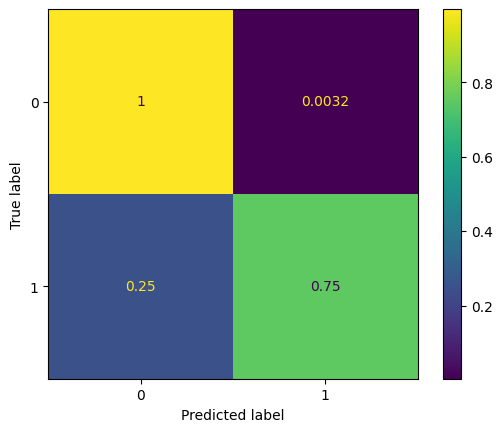

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(random_search_DT, X_test, y_test, normalize='true')